In [ ]:
import pathlib
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
base_dataset_path = r'H:\dev\mit\UNCWave\datasetfiles\FlatVel_A'
folders_to_process = ['model', 'data'] # List the specific folders you want to process
sub_folders_to_process = ['model', 'data']
data ={}

# --- Iteration Logic ---
for folder_name in folders_to_process:
    folder_path = pathlib.Path(base_dataset_path) / folder_name

    # Check if the folder actually exists
    if not folder_path.is_dir():
        print(f"Warning: Folder not found: {folder_path}")
        continue # Skip to the next folder if it doesn't exist

    print(f"\n--- Processing files in: {folder_path} ---")

    # Iterate through all items (files and directories) in the folder
    for item in folder_path.iterdir():
        # Check if the item is a file
        if item.is_file():
            print(f"Found file: {item.name}") # item.name is just the file name
            print(f"Full path: {item}") # item is the full Path object

            # --- Example: Load .npy files ---
            if item.suffix == '.npy': # Check file extension
                try:
                    print(f"Attempting to load .npy file: {item.name}")
                    data[folder_name] = np.load(item)
                    print(f"Successfully loaded {item.name}. Shape: {data.shape}")
                    # You can now work with the 'data' variable
                    # e.g., store it in a dictionary: all_data[item.name] = data
                    # Note: 'data' is overwritten in each iteration
                except Exception as e:
                    print(f"Error loading {item.name}: {e}")

            # --- Add other file type handling here ---
            # elif item.suffix == '.txt':
            #     print(f"Found text file: {item.name}")
            #     with open(item, 'r') as f:
            #         content = f.read()
            #         # Process content
            #         # print(content[:100]) # Print first 100 chars

# If you want to iterate through ALL subdirectories recursively:
# print("\n--- Recursively processing ALL files in all subfolders ---")
# base_path_obj = pathlib.Path(base_dataset_path)
# for item in base_path_obj.rglob('*'): # rglob('*') matches all files and directories recursively
#      if item.is_file():
#          print(f"Found recursive file: {item}")
#          # Add processing logic here, like loading .npy files as shown above
velocity = data['model']
data = data['data']


--- Processing files in: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model ---
Found file: model2.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model\model2.npy
Attempting to load .npy file: model2.npy
Error loading model2.npy: 'dict' object has no attribute 'shape'
Found file: model1.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model\model1.npy
Attempting to load .npy file: model1.npy
Error loading model1.npy: 'dict' object has no attribute 'shape'

--- Processing files in: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data ---
Found file: data2.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data\data2.npy
Attempting to load .npy file: data2.npy
Error loading data2.npy: 'dict' object has no attribute 'shape'
Found file: data1.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data\data1.npy
Attempting to load .npy file: data1.npy
Error loading data1.npy: 'dict' object has no attribute 'shape'


In [ ]:
print('Velocity map size:', velocity.shape)  #Label (batch_size, height, width)   c(x, z)
print('Seismic data size:', data.shape)   #(batch_size, num_sources, time_steps, num_receivers) p(g, t)

Velocity map size: (500, 1, 70, 70)
Seismic data size: (500, 5, 1000, 70)


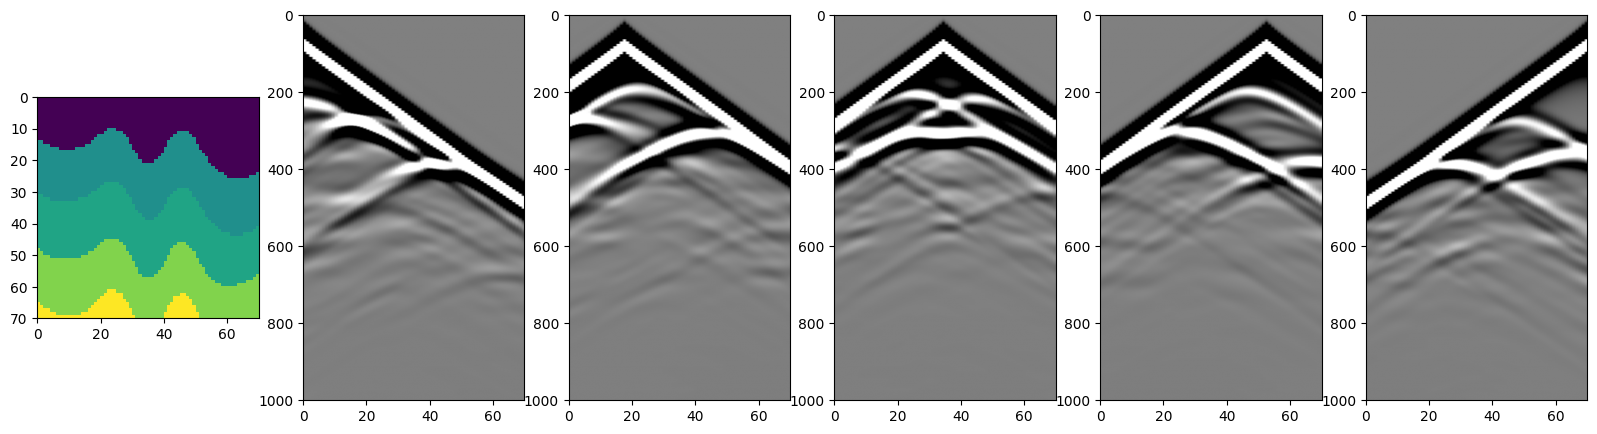

In [49]:
# plt.imshow(velocity[0,0,:,:])
# plt.colorbar()
sample = 1

fig,ax=plt.subplots(1,6,figsize=(20,5))
ax[0].imshow(velocity[sample,0,:,:], extent=[0,70,70,0])
ax[1].imshow(data[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[2].imshow(data[sample,1,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[3].imshow(data[sample,2,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[4].imshow(data[sample,3,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[5].imshow(data[sample,4,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)

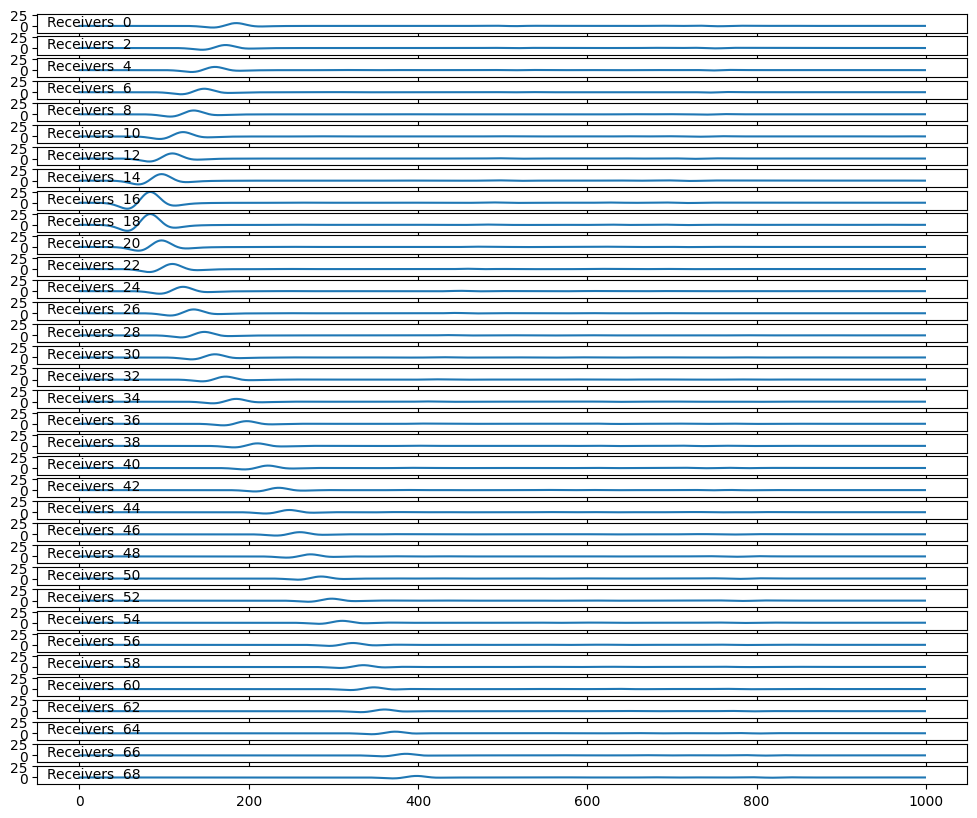

In [62]:
sample = 2
pitch = 2
fig, axs = plt.subplots(int(70//pitch), 1, figsize=(12, 10),sharex=True, sharey=True)

data_layer = []
for i, ax in enumerate(axs):
    data_layer.append(data[sample, 1, :, i*pitch])
    ax.plot(data[sample, 1, :, i*pitch]);
    ax.text(0.01, .95, f'Receivers  {i*pitch}', transform=ax.transAxes,ha='left', va='top');



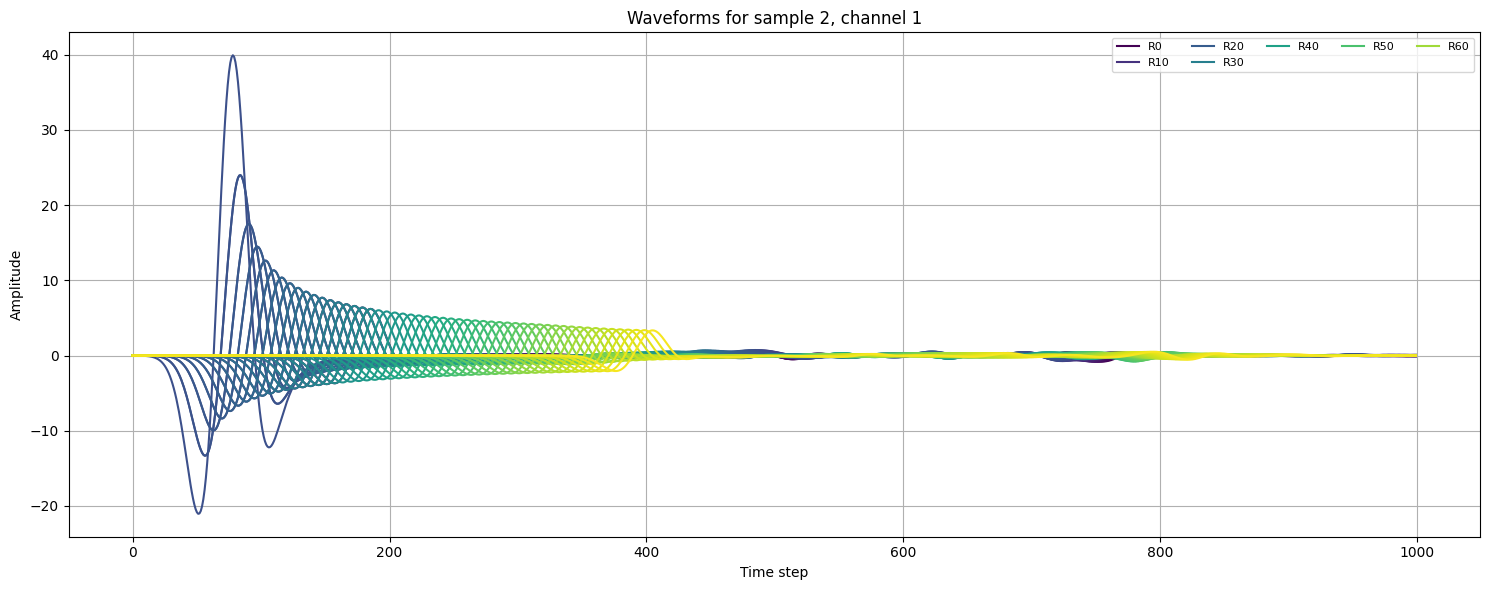

In [65]:
sample = 2
channel = 1
pitch = 1  # use every receiver
num_receivers = 70  # or: data.shape[-1]
time_steps = data.shape[2]

plt.figure(figsize=(15, 6))

# Use a colormap to assign unique colors
cmap = plt.get_cmap('viridis')
colors = [cmap(i / num_receivers) for i in range(num_receivers)]

for i in range(0, num_receivers, pitch):
    trace = data[sample, channel, :, i]  # shape = (time_steps,)
    plt.plot(trace, color=colors[i], label=f'R{i}' if i % 10 == 0 else None)  # label every 10th

plt.title(f"Waveforms for sample {sample}, channel {channel}")
plt.xlabel("Time step")
plt.ylabel("Amplitude")
plt.legend(ncol=5, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

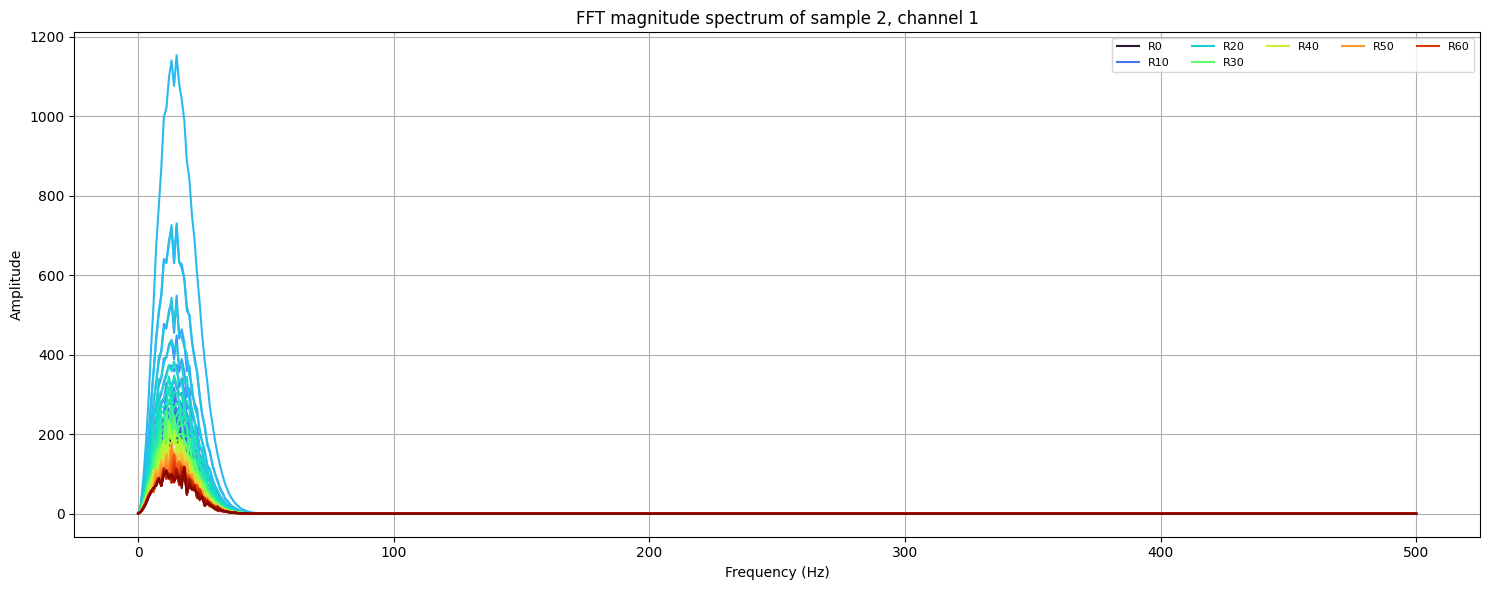

In [66]:

sample = 2
channel = 1
num_receivers = 70
time_steps = data.shape[2]
sampling_rate = 1000  # Hz (you can replace this with your actual rate)

# Frequency axis for plotting
freqs = np.fft.rfftfreq(time_steps, d=1/sampling_rate)  # one-sided frequency spectrum

# Color map
cmap = plt.get_cmap('turbo')  # brighter color map for better contrast
colors = [cmap(i / num_receivers) for i in range(num_receivers)]

plt.figure(figsize=(15, 6))

for i in range(num_receivers):
    trace = data[sample, channel, :, i]
    fft_result = np.fft.rfft(trace)  # one-sided FFT
    magnitude = np.abs(fft_result)
    plt.plot(freqs, magnitude, color=colors[i], label=f'R{i}' if i % 10 == 0 else None)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title(f"FFT magnitude spectrum of sample {sample}, channel {channel}")
plt.legend(ncol=5, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

class FFTAugmentLayer(nn.Module):
    def __init__(self, cutoff=100, phase_std=0.1):
        super().__init__()
        self.cutoff = cutoff
        self.phase_std = phase_std

    def forward(self, x):
        # x: (batch, time, features)
        x_fft = torch.fft.fft(x, dim=1)  # FFT along time axis
        # Bandpass
        x_fft[:, self.cutoff:-self.cutoff, :] = 0
        # Phase jitter
        phase_noise = torch.exp(1j * torch.randn_like(x_fft) * self.phase_std)
        x_fft = x_fft * phase_noise
        x_aug = torch.fft.ifft(x_fft, dim=1).real
        return x_aug

""" Apply before attention layer """
x = FFTAugmentLayer()(x)
x = TransformerBlock(...)(x)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FFTAugmentLayer(nn.Module):
    def __init__(self, cutoff=100, phase_std=0.1):
        super().__init__()
        self.cutoff = cutoff
        self.phase_std = phase_std

    def forward(self, x):
        # x: (batch, seq_len, dim)
        x_fft = torch.fft.fft(x, dim=1)

        # Apply bandpass filter
        x_fft[:, self.cutoff:-self.cutoff, :] = 0

        # Add small random phase noise (optional)
        phase_noise = torch.exp(
            1j * torch.randn_like(x_fft) * self.phase_std
        )
        x_fft = x_fft * phase_noise

        # Inverse FFT to return to time domain
        x_aug = torch.fft.ifft(x_fft, dim=1).real
        return x_aug


class TransformerEncoderBlock(nn.Module):
    def __init__(self, dim, n_heads, ff_hidden_dim, dropout=0.1, fft_augment=True):
        super().__init__()
        self.fft_augment = FFTAugmentLayer() if fft_augment else nn.Identity()

        self.norm1 = nn.LayerNorm(dim)
        self.attn = nn.MultiheadAttention(embed_dim=dim, num_heads=n_heads, batch_first=True)
        
        self.norm2 = nn.LayerNorm(dim)
        self.ffn = nn.Sequential(
            nn.Linear(dim, ff_hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(ff_hidden_dim, dim),
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x: (batch, seq_len, dim)
        
        # Frequency-domain preprocessing
        x = self.fft_augment(x)

        # Self-attention
        x_norm = self.norm1(x)
        attn_out, _ = self.attn(x_norm, x_norm, x_norm)
        x = x + self.dropout(attn_out)

        # Feedforward
        x_norm = self.norm2(x)
        ffn_out = self.ffn(x_norm)
        x = x + self.dropout(ffn_out)

        return x


class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, embed_dim, depth, n_heads, ff_hidden_dim, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, embed_dim)
        self.encoder_layers = nn.ModuleList([
            TransformerEncoderBlock(
                dim=embed_dim,
                n_heads=n_heads,
                ff_hidden_dim=ff_hidden_dim,
                dropout=dropout,
                fft_augment=True  # toggle to False if you want to skip it
            )
            for _ in range(depth)
        ])
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        x = self.input_proj(x)
        for layer in self.encoder_layers:
            x = layer(x)
        x = self.norm(x)
        return x

In [ ]:
# Simulated waveform input: batch of 32 waveforms, each with 512 time steps, 1 channel
dummy_waveforms = torch.randn(32, 512, 1)

model = TransformerEncoder(
    input_dim=1,
    embed_dim=64,
    depth=4,
    n_heads=4,
    ff_hidden_dim=128
)

out = model(dummy_waveforms)
print(out.shape)  # (32, 512, 64)

"Our model architecture uses a ***Transformer encoder*** to learn robust latent representations from raw seismic waveforms combined with Fourier-domain features. This dual-domain input helps the model better capture temporal and spectral characteristics, improving noise resilience. A ***ConvNeXt-based decoder*** then reconstructs the 2D subsurface velocity map from these features. To stabilize training and enhance generalization, we employ ***Exponential Moving Average (EMA)*** on model weights, which acts as a smooth filter over the parameter updates."

#### If you want, I can help you:

 - Design the dual-input pipeline (raw + Fourier) for the Transformer

 - Sketch out the ConvNeXt decoder architecture

 - Implement EMA integration with your training loop

In [ ]:
## Concatanation Approach

class SimpleTransformerEncoder(nn.Module):
    def __init__(self, input_dim, embed_dim, n_heads):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, batch_first=True)
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        x = self.input_proj(x)
        attn_out, _ = self.attn(x, x, x)
        x = self.norm(x + attn_out)
        return x

def get_frequency_features(waveform):
    # waveform: (batch, seq_len, 1)
    fft = torch.fft.fft(waveform.squeeze(-1), dim=1)
    freq_features = torch.stack([fft.real, fft.imag], dim=-1)  # (batch, seq_len, 2)
    return freq_features

# Example inputs
batch_size = 8
seq_len = 512
waveform = torch.randn(batch_size, seq_len, 1)

# Get frequency features
freq_features = get_frequency_features(waveform)

# Concatenate along feature dimension: raw (1) + freq (2) = 3 features total
combined_input = torch.cat([waveform, freq_features], dim=-1)  # (batch, seq_len, 3)

model = SimpleTransformerEncoder(input_dim=3, embed_dim=64, n_heads=4)
output = model(combined_input)
print(output.shape)  # (batch, seq_len, embed_dim)


## Multi Branch Approach
class TimeBranch(nn.Module):
    def __init__(self, input_dim, embed_dim):
        super().__init__()
        self.proj = nn.Linear(input_dim, embed_dim)
    def forward(self, x):
        return self.proj(x)

class FreqBranch(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        # Example: simple 1-layer MLP
        self.mlp = nn.Sequential(
            nn.Linear(2, embed_dim),  # 2 = real + imag parts
            nn.ReLU()
        )
    def forward(self, x):
        return self.mlp(x)

class MultiBranchTransformer(nn.Module):
    def __init__(self, embed_dim, n_heads):
        super().__init__()
        self.time_branch = TimeBranch(1, embed_dim)
        self.freq_branch = FreqBranch(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim=embed_dim*2, num_heads=n_heads, batch_first=True)
        self.norm = nn.LayerNorm(embed_dim*2)

    def forward(self, time_x, freq_x):
        # time_x: (batch, seq_len, 1)
        # freq_x: (batch, seq_len, 2)
        time_feat = self.time_branch(time_x)  # (batch, seq_len, embed_dim)
        freq_feat = self.freq_branch(freq_x)  # (batch, seq_len, embed_dim)
        combined = torch.cat([time_feat, freq_feat], dim=-1)  # (batch, seq_len, 2*embed_dim)
        attn_out, _ = self.attn(combined, combined, combined)
        out = self.norm(combined + attn_out)
        return out

# Example inputs
waveform = torch.randn(batch_size, seq_len, 1)
freq_features = get_frequency_features(waveform)

model = MultiBranchTransformer(embed_dim=64, n_heads=4)
output = model(waveform, freq_features)
print(output.shape)  # (batch, seq_len, embed_dim*2)

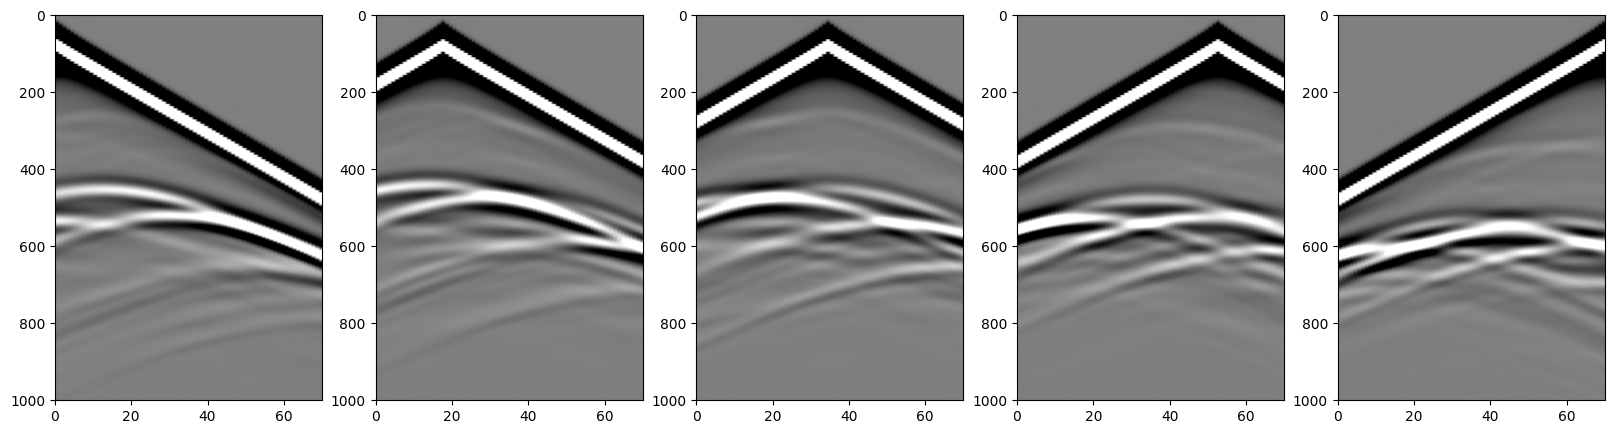

In [40]:
fig,ax=plt.subplots(1,5,figsize=(20,5))
ax[0].imshow(data[0,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[1].imshow(data[0,1,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[2].imshow(data[0,2,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[3].imshow(data[0,3,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)
ax[4].imshow(data[0,4,:,:], extent=[0,70,1000,0], aspect='auto', cmap='gray', vmin=-0.5, vmax=0.5)


##### ✅ Hybrid model (ConvNeXt + Attention) with EMA
-Use 3D convolutions to process (num_sources, time_steps, num_receivers) as spatio-temporal blocks

-Then apply attention (Transformer or Performer) across aggregated embeddings

-Finally use a CNN decoder to map to (height, width)

-Or:

##### ✅ Transformer encoder with EMA
-Flatten num_sources × num_receivers into tokens

-Treat time_steps as temporal sequences

-Output 2D image via a learned token map or upsampling head

- Positional encodings for time/source/receiver positions

- Fourier features for long-range patterns

- Residual connections for stability

- Pretraining on simulated data

### ✅ Best model recommendation
##### 🏆 Hybrid model: 3D CNN (ConvNeXt-like) + Transformer + EMA
##### ✅ Why this architecture?
##### ✅ 1. Local feature extraction (ConvNeXt/3D CNN)
###### Your data has strong local spatio-temporal patterns across:

Sources

Receivers



yes it is waveform-inversion  from waveform, predict velocity map

#Label (batch_size, height, width)   = subsurface image 
#(batch_size, num_sources, time_steps, num_receivers)

what kind of model do you recomment to predict.  wavenet with EMA, convnext type convolution with EMA, attention transformetr with EMA?